In the CPE 695: Applied Machine Learning final project, I use the Decision Tree Algorithm to build a movie recommendation system based on the Movie-Lens 20M data set. This recommendation system could determines whether a movie will be recommended or not.

This file is written by Jiarong Xia.

# Count the number of times each genre keyword appear.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('movies.csv',  usecols=['movieId', 'title', 'genres'])

genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

# Function that counts the number of times each of the genre keywords appear
def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

# Calling this function gives access to a list of genre keywords which are sorted by decreasing frequency
keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:-1]

[['Drama', 13344],
 ['Comedy', 8374],
 ['Thriller', 4178],
 ['Romance', 4127],
 ['Action', 3520],
 ['Crime', 2939],
 ['Horror', 2611],
 ['Documentary', 2471],
 ['Adventure', 2329],
 ['Sci-Fi', 1743],
 ['Mystery', 1514],
 ['Fantasy', 1412],
 ['War', 1194],
 ['Children', 1139],
 ['Musical', 1036],
 ['Animation', 1027],
 ['Western', 676],
 ['Film-Noir', 330],
 ['(no genres listed)', 246]]

# Use the WordCloud to show all of the genres, the genre appear more times, its name in the WordCloud more bigger.

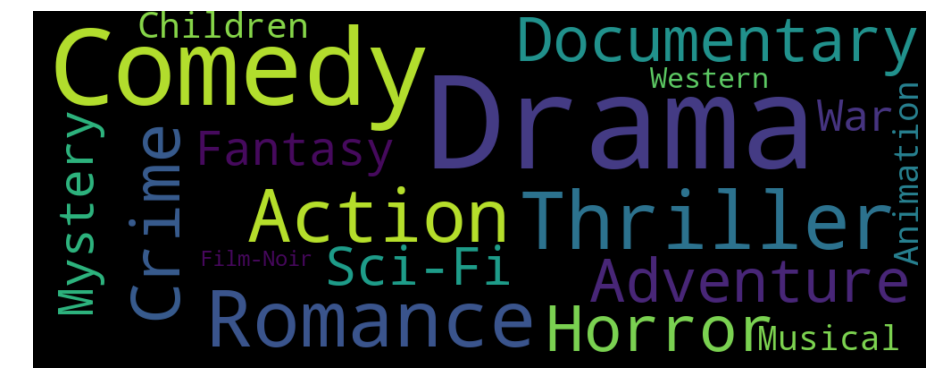

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud, STOPWORDS

movies = pd.read_csv('movies.csv',  usecols=['movieId', 'title', 'genres'])

genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]
    
# def random_color_func(word=None, font_size=None, position=None,  orientation=None, font_path=None, random_state=None):
#         h  = randint(120,250)
#         s = int(100.0 * 255.0 / 255.0)
#         l = int(100.0 * float(randint(60, 120)) / 255.0)
#         return "hsl({}, {}%, {}%)".format(h, s, l)


# Create the wordcloud
genre_wordcloud = WordCloud(width=1000,height=400, background_color='black')
genre_wordcloud.generate_from_frequencies(genres)

# Plot the wordcloud
f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Some movies' rating_size is very small, so I only use the data that its rating_size >= 150

In [4]:
import pandas as pd
data=pd.read_csv('rating_mean.csv',header=0,encoding = 'unicode_escape')
haha1=data[data['rating_size']>=150].sort_values([('rating_mean')],ascending=False)
haha1.to_csv('haha1.csv')

In [5]:
data['rating_mean'].describe()

count    26745.000000
mean         3.133343
std          0.664094
min          0.500000
25%          2.800000
50%          3.235529
75%          3.565217
max          5.000000
Name: rating_mean, dtype: float64

# Form a new matrix in which each genre has a own column to represent whether this movie has this genre. Also add a new column named "recommend", if the rating_mean >= 3.13, recomend this movie, vice versa.

In [6]:
haha1['drama'] = '0'
for idx, row in haha1.iterrows():
    genres = row['genres'].split('|')
    if 'Drama' in genres:
        haha1.loc[idx, 'drama'] = '1'   
        
haha1['comedy'] = '0'
for idx, row in haha1.iterrows():
    genres = row['genres'].split('|')
    if 'Comedy' in genres:
        haha1.loc[idx, 'comedy'] = '1' 
        
haha1['thriller'] = '0'
for idx, row in haha1.iterrows():
    genres = row['genres'].split('|')
    if 'Thriller' in genres:
        haha1.loc[idx, 'thriller'] = '1'
        
haha1['romance'] = '0'
for idx, row in haha1.iterrows():
    genres = row['genres'].split('|')
    if 'Romance' in genres:
        haha1.loc[idx, 'romance'] = '1'  
        
haha1['action'] = '0'
for idx, row in haha1.iterrows():
    genres = row['genres'].split('|')
    if 'Action' in genres:
        haha1.loc[idx, 'action'] = '1' 
        
haha1['crime'] = '0'
for idx, row in haha1.iterrows():
    genres = row['genres'].split('|')
    if 'Crime' in genres:
        haha1.loc[idx, 'crime'] = '1' 
        
haha1['horror'] = '0'
for idx, row in haha1.iterrows():
    genres = row['genres'].split('|')
    if 'Horror' in genres:
        haha1.loc[idx, 'horror'] = '1' 
        
haha1['documentary'] = '0'
for idx, row in haha1.iterrows():
    genres = row['genres'].split('|')
    if 'Documentary' in genres:
        haha1.loc[idx, 'documentary'] = '1'  
            
haha1['adventure'] = '0'
for idx, row in haha1.iterrows():
    genres = row['genres'].split('|')
    if 'Adventure' in genres:
        haha1.loc[idx, 'adventure'] = '1'   
        
haha1['recommend'] = '0'
for idx, row in haha1.iterrows():
    rating_mean = row['rating_mean']
    if rating_mean >= 3.13:
        haha1.loc[idx, 'recommend'] = '1'

haha1.head(20)

,Unnamed: 0,movieId,title,genres,rating_size,rating_mean,drama,comedy,thriller,romance,action,crime,horror,documentary,adventure,recommend
315,315,318,"Shawshank Redemption, The (1994)",Crime|Drama,63366.0,4.446990,1,0,0,0,0,1,0,0,0,1
845,845,858,"Godfather, The (1972)",Crime|Drama,41355.0,4.364732,1,0,0,0,0,1,0,0,0,1
49,49,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,47006.0,4.334372,0,0,1,0,0,1,0,0,0,1
523,523,527,Schindler's List (1993),Drama|War,50054.0,4.310175,1,0,0,0,0,0,0,0,0,1
1197,1197,1221,"Godfather: Part II, The (1974)",Crime|Drama,27398.0,4.275641,1,0,0,0,0,1,0,0,0,1
1938,1938,2019,Seven Samurai (Shichinin no samurai) (1954),Action|Adventure|Drama,11611.0,4.274180,1,0,0,0,1,0,0,0,1,1
889,889,904,Rear Window (1954),Mystery|Thriller,17449.0,4.271334,0,0,1,0,0,0,0,0,0,1
7360,7360,7502,Band of Brothers (2001),Action|Drama|War,4305.0,4.263182,1,0,0,0,1,0,0,0,0,1
897,897,912,Casablanca (1942),Drama|Romance,24349.0,4.258327,1,0,0,1,0,0,0,0,0,1
907,907,922,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),Drama|Film-Noir|Romance,6525.0,4.256935,1,0,0,1,0,0,0,0,0,1


In [7]:
X = haha1[['drama', 'comedy', 'thriller', 'romance', 'action', 'crime', 'horror', 'documentary', 'adventure']]
Y = haha1['recommend']

# Split the data into two parts: training and testing.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,  Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [10]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer (sparse  = False)

X_train = vec.fit_transform((X_train.to_dict(orient = 'record')))
X_test = vec.fit_transform((X_test.to_dict(orient = 'record')))

print(vec.feature_names_)

['action=0', 'action=1', 'adventure=0', 'adventure=1', 'comedy=0', 'comedy=1', 'crime=0', 'crime=1', 'documentary=0', 'documentary=1', 'drama=0', 'drama=1', 'horror=0', 'horror=1', 'romance=0', 'romance=1', 'thriller=0', 'thriller=1']


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train,Y_train)
Y_predict = clf.predict(X_test)  # Using the training data to learn the model 
Y_predict

array(['0', '0', '1', ..., '1', '0', '1'], dtype=object)

In [12]:
from sklearn import metrics
print("Accuracy",metrics.accuracy_score(Y_test,Y_predict))

Accuracy 0.7169559412550067


# Compute the confuse matrix.

In [13]:
predict_train = clf.predict(X_train)
result_train = metrics.confusion_matrix(Y_train, predict_train)
print(result_train)

[[ 843  840]
 [ 548 3010]]


In [14]:
predict_test = clf.predict(X_test)
result_test = metrics.confusion_matrix(Y_test, predict_test)
print(result_test)

[[ 345  372]
 [ 264 1266]]


# Compute the accuracies.

In [15]:
print("The in-sample recommend accuracy is: ",100*result_train[1][1]/(result_train[1][1]+result_train[1][0]),"%")
print("The in-sample no_recommend accuracy is: ",100*result_train[0][0]/(result_train[0][0]+result_train[0][1]),"%")
print("The out-sample recommend accuracy is: ",100*result_test[1][1]/(result_test[1][1]+result_test[1][0]),"%")
print("The out-sample no_recommend accuracy is: ",100*result_test[0][0]/(result_test[0][0]+result_test[0][1]),"%")

The in-sample recommend accuracy is:  84.59808881394042 %
The in-sample no_recommend accuracy is:  50.08912655971479 %
The out-sample recommend accuracy is:  82.74509803921569 %
The out-sample no_recommend accuracy is:  48.11715481171548 %


# Draw the full Decision Tree

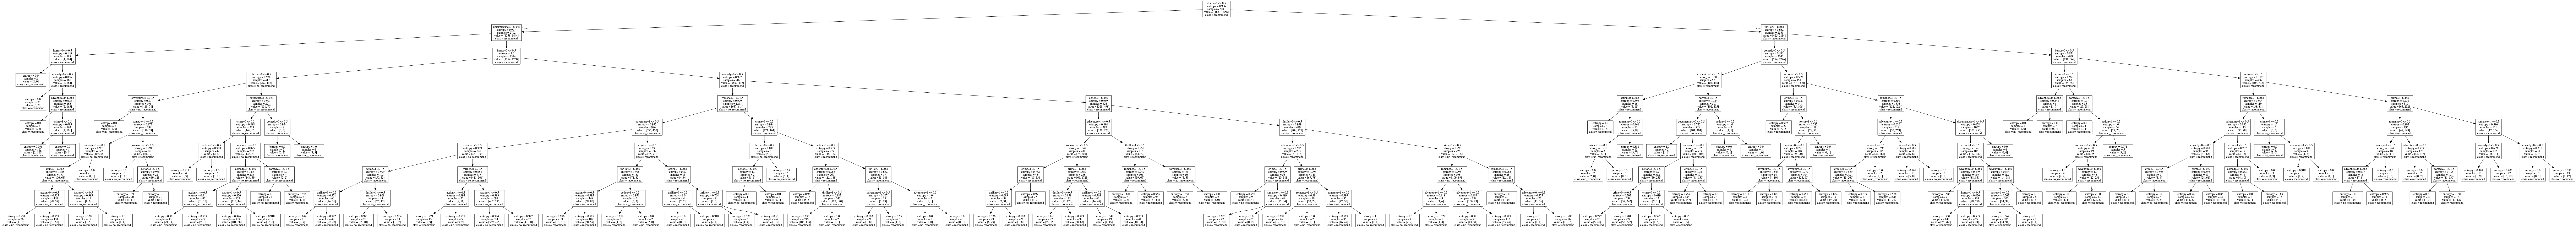

In [16]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names = vec.get_feature_names(), class_names = ['no_recommend','recommend'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('full_tree.png') 
Image(graph.create_png())

In [17]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn import tree
depth = []
for i in range(3,20):
    dtc = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(dtc , X_train, Y_train, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, 0.701776240827682), (4, 0.7080701051873596), (5, 0.7145562252088601), (6, 0.7185692125618302), (7, 0.7181877508862508), (8, 0.716657319852325), (9, 0.7189432877654036), (10, 0.7189432877654036), (11, 0.7189432877654036), (12, 0.7189432877654036), (13, 0.7189432877654036), (14, 0.7189432877654036), (15, 0.7189432877654036), (16, 0.7189432877654036), (17, 0.7189432877654036), (18, 0.7189432877654036), (19, 0.7189432877654036)]


# Find the best leaf node.

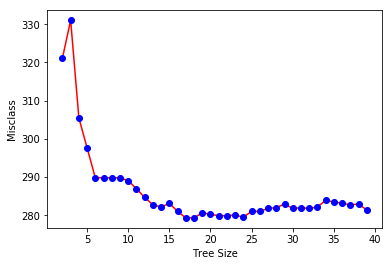

In [18]:
%matplotlib inline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
leaf_number=list(range(2,40))
misclass_number=[]
parameter={'max_leaf_nodes':leaf_number}
pruned_DTC = tree.DecisionTreeClassifier(criterion='entropy')
grid_search = GridSearchCV(pruned_DTC, parameter, cv = 10, scoring = 'accuracy')# use GridSearchCV function to search cv for 15 folds to find the best leaf node number
grid_search.fit(X_train, Y_train) # Train the model
for score in grid_search.cv_results_['mean_test_score']:
    misclass_number.append((1-score) *1000)           # Collect the misclass number 
#max_leaf_nodes[0] = 1
plt.plot(leaf_number, misclass_number, color = 'red')
plt.plot(leaf_number, misclass_number, 'bo')
plt.xlabel("Tree Size")
plt.ylabel("Misclass")
plt.show()

In [19]:
grid_search.best_params_['max_leaf_nodes']

17

# Use the best leaf node to prune the tree.

In [20]:
DTC_new_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes =17) 
DTC_new_tree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=17,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Compute the confuse matrix.

In [21]:
# confusion matrix of the training data
new_predict_train = DTC_new_tree.predict(X_train) #build a new confusion matrix with training data and test data
new_result_train = metrics.confusion_matrix(Y_train,new_predict_train)
print(new_result_train)

[[ 732  951]
 [ 507 3051]]


In [22]:
# confusion matrix of the testing data
new_predict_test = DTC_new_tree.predict(X_test)
new_result_test = metrics.confusion_matrix(Y_test,new_predict_test)
print(new_result_test)

[[ 314  403]
 [ 230 1300]]


# Compute the accuracies.

In [23]:
print("The in-sample recommend accuracy is: ",100*new_result_train[1][1]/(new_result_train[1][1]+new_result_train[1][0]), "%")
print("The in-sample no_recommend accuracy is: ",100*new_result_train[0][0]/(new_result_train[0][0]+new_result_train[0][1]), "%")
print("The out-sample recommend accuracy is: ",100*new_result_test[1][1]/(new_result_test[1][1]+new_result_test[1][0]), "%")
print("The out-sample no_recommend accuracy is: ",100*new_result_test[0][0]/(new_result_test[0][0]+new_result_test[0][1]), "%")

The in-sample recommend accuracy is:  85.7504215851602 %
The in-sample no_recommend accuracy is:  43.49376114081996 %
The out-sample recommend accuracy is:  84.9673202614379 %
The out-sample no_recommend accuracy is:  43.793584379358435 %


# Draw the new Decision Tree.

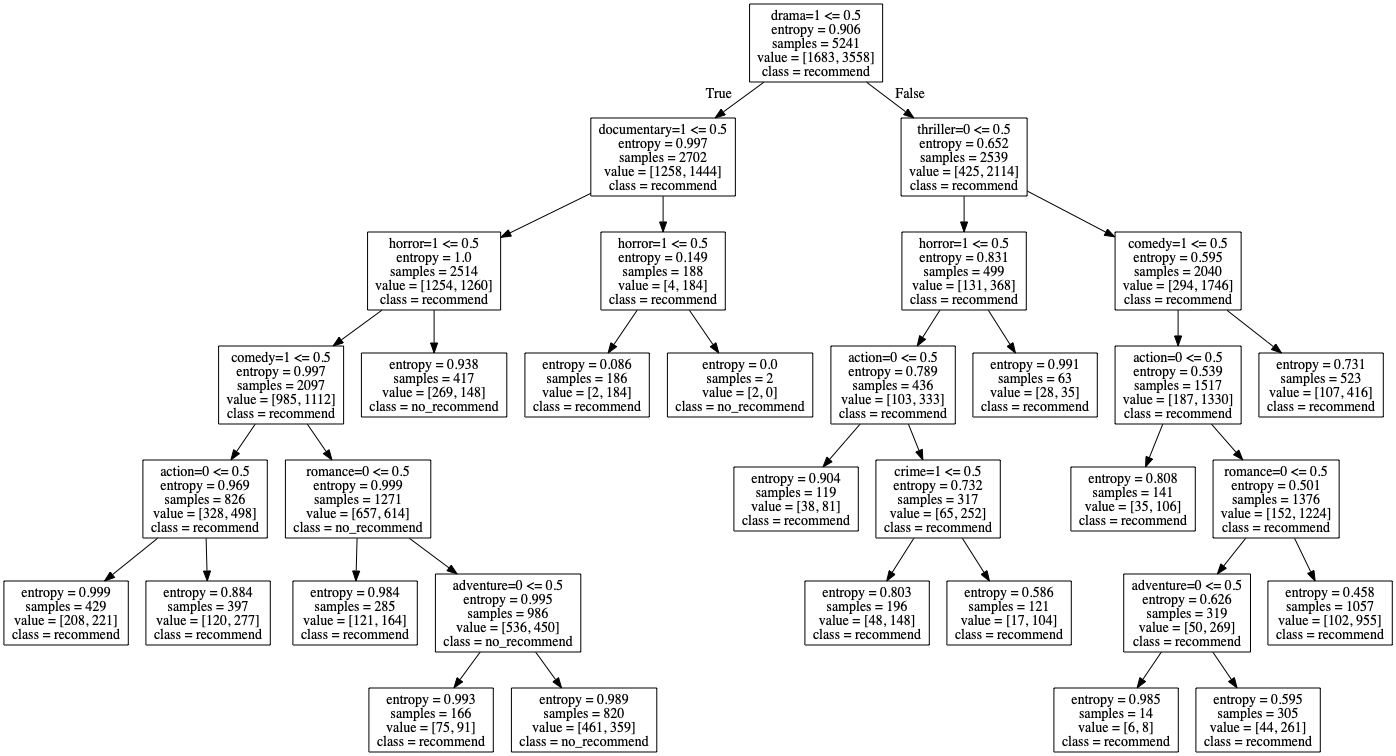

In [24]:
dot_data = StringIO()
export_graphviz(DTC_new_tree, out_file=dot_data, feature_names = vec.get_feature_names(), class_names = ['no_recommend','recommend'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('new_tree.png') 
Image(graph.create_png())

# How this Decision Tree work:

### First we need to input the movie's name. Then input the movie's genre.

In [25]:
movie_name = input('Please input the movie name(or keywords): ')
movie_genres = input('Please input the movie genres: ')

Please input the movie name(or keywords): North by Northwest (1959)
Please input the movie genres: Action|Adventure|Mystery|Romance|Thriller


In [26]:
movie_genres

'Action|Adventure|Mystery|Romance|Thriller'

In [27]:
list = movie_genres.split('|')

In [28]:
len(list)

5

# Following is the code of the decision tree I got.

In [29]:
i = len(list)

if 'Drama' in movie_genres:
    i=i-1
    if i !=0:
        if 'Documentary' not in movie_genres:
            i=i-1
            if i !=0:
                if 'Honor' not in movie_genres:
                    print('N')
                else:
                    print('R')
            else:
                print('R')
        elif 'Documentary'  in movie_genres:
            i=i-1
            if i !=0:
                if 'Honor' in movie_genres:
                    i=i-1
                    if i!=0:
                        if 'Comedy' not in movie_genres:
                            i=i-1
                            if i !=0:
                                if 'Romance' in movie_genres:
                                    i=i-1
                                    if i !=0:
                                        if 'Adventure' in movie_genres:
                                            print('R')
                                        else:
                                            print('N') 
                                    else:
                                        print('N') 
                                else:
                                    print('R')
                            else:
                                print('N') 
                        elif 'Comedy'  in movie_genres:
                            i=i-1
                            if i !=0:
                                if 'Action' in movie_genres:
                                    print('R')
                                else:
                                    print('N')
                            else:
                                print('R')
                    else:
                        print('R')
                else:
                    print('N')
            else:
                print('R')
                
       
    else:
        print('R')
        
        
elif 'Drama' not in movie_genres: 
    i=i-1
    if i !=0:
        if 'Thriller' not in movie_genres:
            i=i-1
            if i !=0:
                if 'Honor'  in movie_genres:
                    i=i-1
                    if i !=0:
                        if 'Action' in movie_genres:
                            i=i-1
                            if i !=0:
                                if 'Crime' in movie_genres:
                                    print('R')
                                else:
                                    print('R')
                            else:
                                print('R')
                        else:
                            print('R')
                    else:
                        print('R')
                else:
                    print('R')
            else:
                print('R')
        elif 'Thriller' in movie_genres:
            i=i-1
            if i !=0:
                if 'Comdey' in movie_genres:
                    i=i-1
                    if i !=0:
                        if 'Action' in movie_genres:
                            i=i-1
                            if i !=0:
                                if 'Romance' not in movie_genres:
                                    i=i-1
                                    if i !=0:
                                        if 'Adventure' not in movie_genres:
                                            print('R')
                                        else:
                                            print('R')
                                    else:
                                        print('R')
                                else:
                                    print('R')
                            else:
                                print('R')
                        else:
                            print('R')
                    else:
                        print('R')
                else:
                    print('R')
            else:
                print('R')
            
    else:
        print('R')
    

R


# "R" means this movie will be recommended to the user based on the Decision Tree.  If the result trun out to be "N", which means this movie will not be recommended to the user.